In [1]:
import pandas as pd
import matplotlib.pyplot as plt
car_data=pd.read_excel("car_data.xlsx")
car_data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#Basic analysis. See the list of columns, get the info, details, describe, data type, category etc on the columns. Identify which of this can considered for target variable

In [2]:
car_data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

There are a lot of columns. Let's understand the number of rows and columns first

In [3]:
len(car_data.columns)

26

In [4]:
len(car_data)

205

There are 26 columns and 205 rows. Let get more info on the data and what type of data is stored

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

## Here are some key observations:

1. all the rows seem to have data. non-null count is 205 across all columns
2. There are both categorical and continuous data

let's get value count / frequency analysis for categorical data first

In [6]:
car_data['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

We are able to see the frequency in terms of numbers. Let's see it percentages

In [7]:
car_data['make'].value_counts(normalize=True)

toyota           0.156098
nissan           0.087805
mazda            0.082927
mitsubishi       0.063415
honda            0.063415
volkswagen       0.058537
subaru           0.058537
peugot           0.053659
volvo            0.053659
dodge            0.043902
mercedes-benz    0.039024
bmw              0.039024
audi             0.034146
plymouth         0.034146
saab             0.029268
porsche          0.024390
isuzu            0.019512
jaguar           0.014634
chevrolet        0.014634
alfa-romero      0.014634
renault          0.009756
mercury          0.004878
Name: make, dtype: float64

Toyota car makes almost 16% of the data, while nissan and mazda, together make just over 16% of the data distribution.
Now let's see the count and percentages in a graph

<AxesSubplot:>

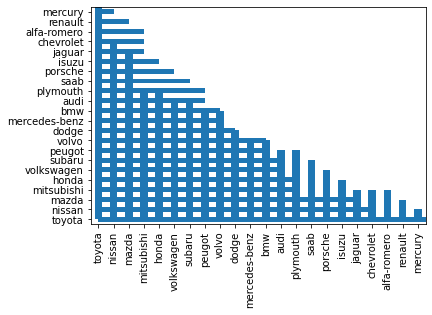

In [8]:
car_data['make'].value_counts().plot(kind='bar')
car_data['make'].value_counts().plot(kind='barh')

The two plots are overlapping. We need to set sub plots so that they don't overlap

<AxesSubplot:>

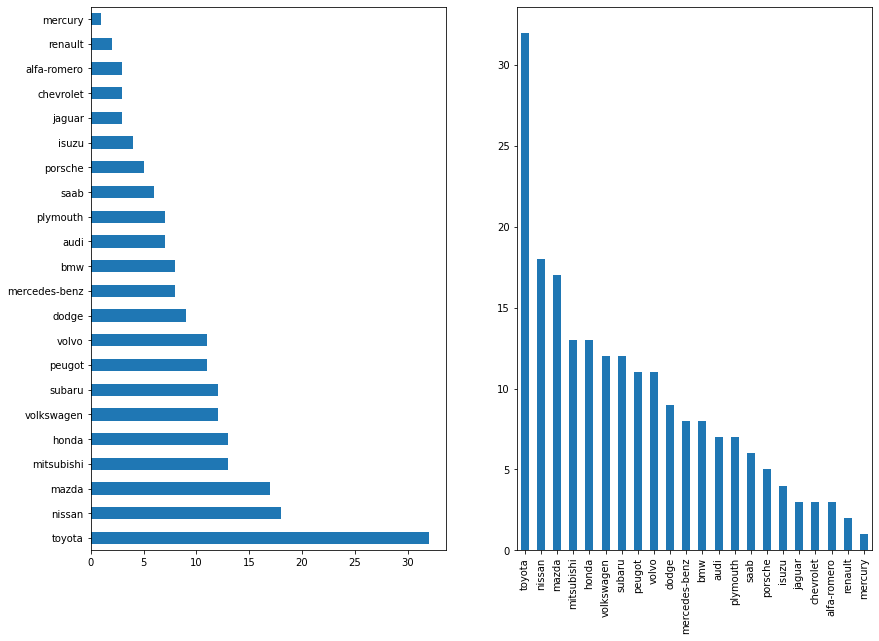

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (14,10))
car_data['make'].value_counts().plot(kind='barh',ax=ax1)
car_data['make'].value_counts().plot(kind='bar',ax=ax2)

Now, we want to see multiple grpahs in the same plot based on various category types

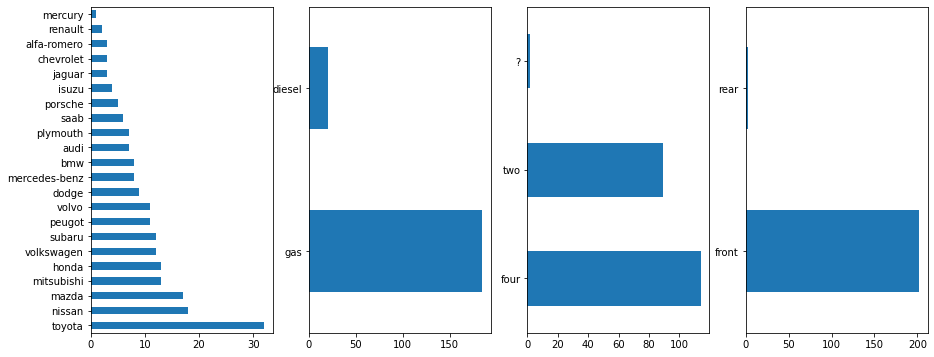

In [10]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,6))
car_data['make'].value_counts().plot(kind='barh',ax=ax1)
car_data['fuel_type'].value_counts().plot(kind='barh',ax=ax2)
car_data['num_of_doors'].value_counts().plot(kind='barh',ax=ax3)
car_data['engine_location'].value_counts().plot(kind='barh',ax=ax4)
plt.show()

Let's sort the values from highest to lowest (please note for this, we use ascending = true)

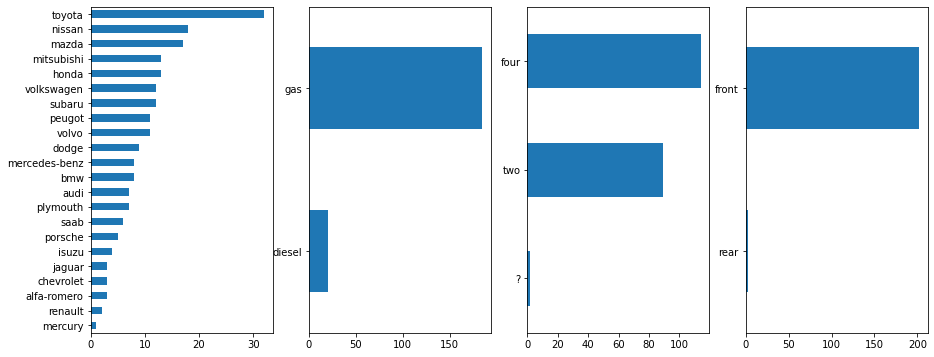

In [11]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,6))
car_data['make'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax1)
car_data['fuel_type'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax2)
car_data['num_of_doors'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax3)
car_data['engine_location'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax4)
plt.show()

Now, we have created 4 graphs in 1 row, let's try to create it in 2 x 2 format

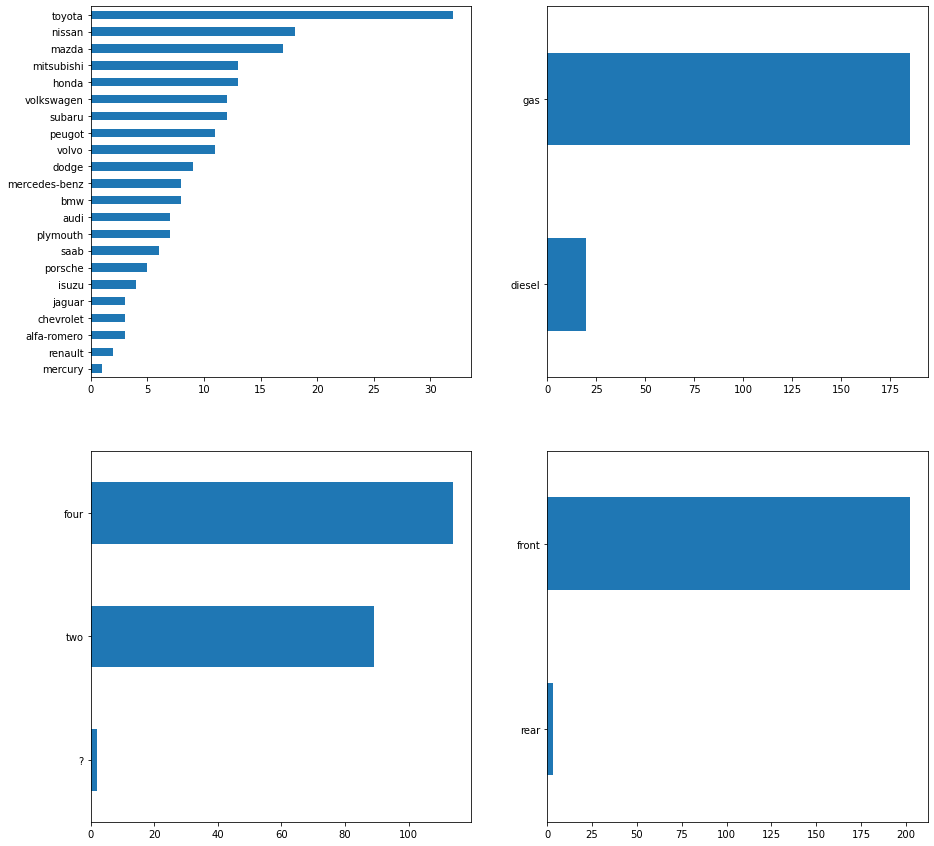

In [12]:
fig, ax = plt.subplots(2,2,figsize = (15,15))
car_data['make'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,0])
car_data['fuel_type'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,1])
car_data['num_of_doors'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,0])
car_data['engine_location'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,1])
plt.show()

Please note that in the above graph, we have passed the index positions [0,1] etc to specify which row and column we want the chart to appear
Now let's change the colors and see

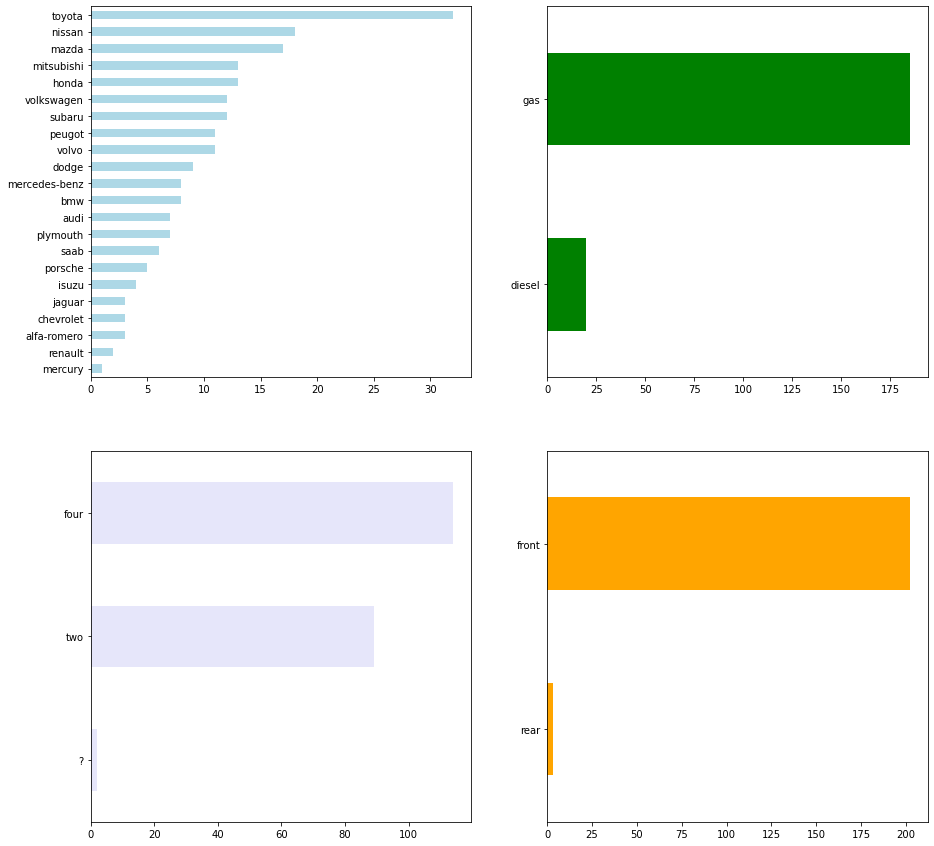

In [13]:
fig, ax = plt.subplots(2,2,figsize = (15,15))
car_data['make'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,0],color='lightblue')
car_data['fuel_type'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,1],color='green')
car_data['num_of_doors'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,0],color='lavender')
car_data['engine_location'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,1],color='orange')
plt.show()

We can also change the color based on hexdecimal and rgb values and also rgba values

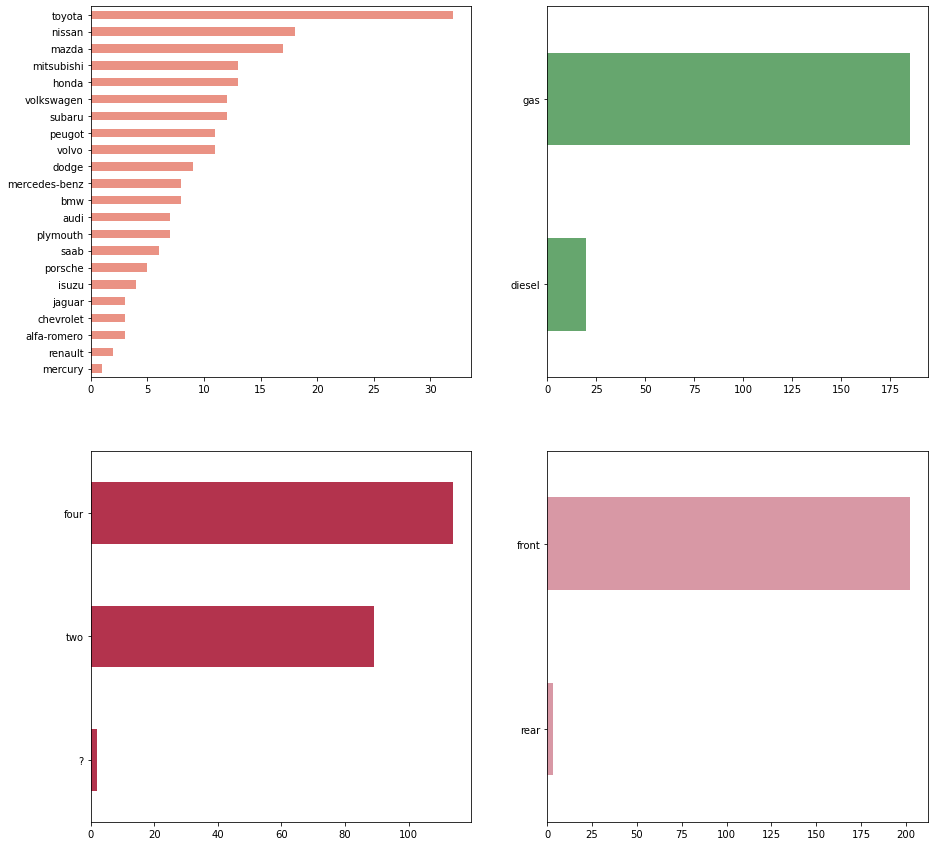

In [14]:
fig, ax = plt.subplots(2,2,figsize = (15,15))
car_data['make'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,0],color='#ea9284')
car_data['fuel_type'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,1],color=(.4,.65,.43))
car_data['num_of_doors'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,0],color=(.7,.2,.3))
car_data['engine_location'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,1],color=(.7,.2,.3,.5))
plt.show()

A few more color's are tried out here

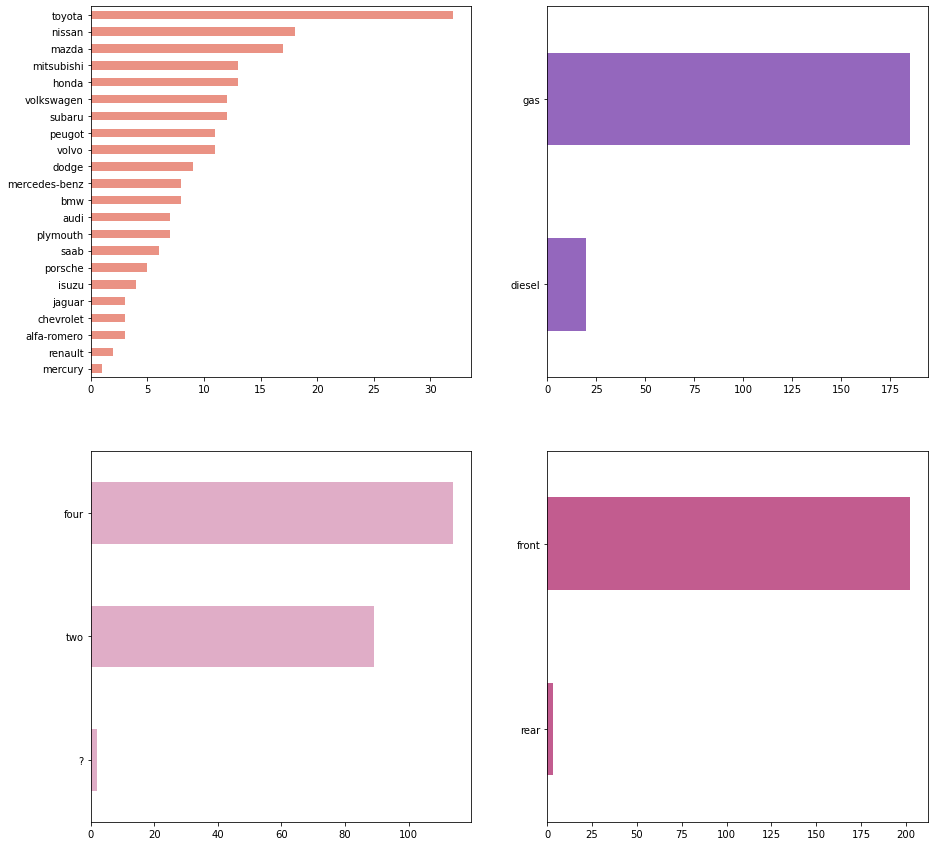

In [15]:
fig, ax = plt.subplots(2,2,figsize = (15,15))
p1 = car_data['make'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,0],color='#ea9284')
p2 = car_data['fuel_type'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[0,1],color='tab:purple')
p3 = car_data['num_of_doors'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,0],color=(.7,.2,.45,.4))
p4 = car_data['engine_location'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=ax[1,1],color=(.7,.2,.45,.8))
plt.show()

In [16]:
car_data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In the above, we can see the standard descriptive statistics details of the dataset that has continuous values. We will explore the relationshisps between them.

# Let's start the data analysis!

## Target Variable: Drive_wheel

In this dataset, we have data about the car and we will consider the price of the car as the target variable. We will view how all the other characteristics of the car like, make, fuel type, wheel base, length etc, affect the price of the car

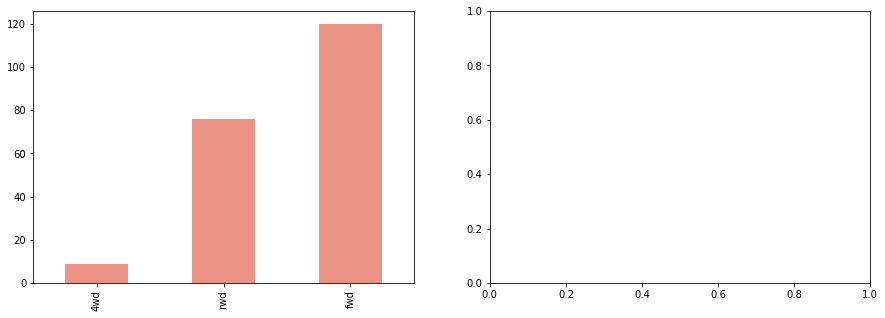

In [17]:
car_data['drive_wheels'].value_counts(normalize=True,ascending=True)
fig, ax = plt.subplots(1,2,figsize = (15,5))
p1 = car_data['drive_wheels'].value_counts().sort_values(ascending=True).plot(kind='bar',ax=ax[0],color='#ea9284')


### 58% of the cars provide front wheel drive, where as only 37% provide rear wheel drive. The 4 wheel drive or all wheel drive is very less, accounting for only 4% of the cars. Not many people are into off-roading, because for off-roading, 4 wheel drive is a must

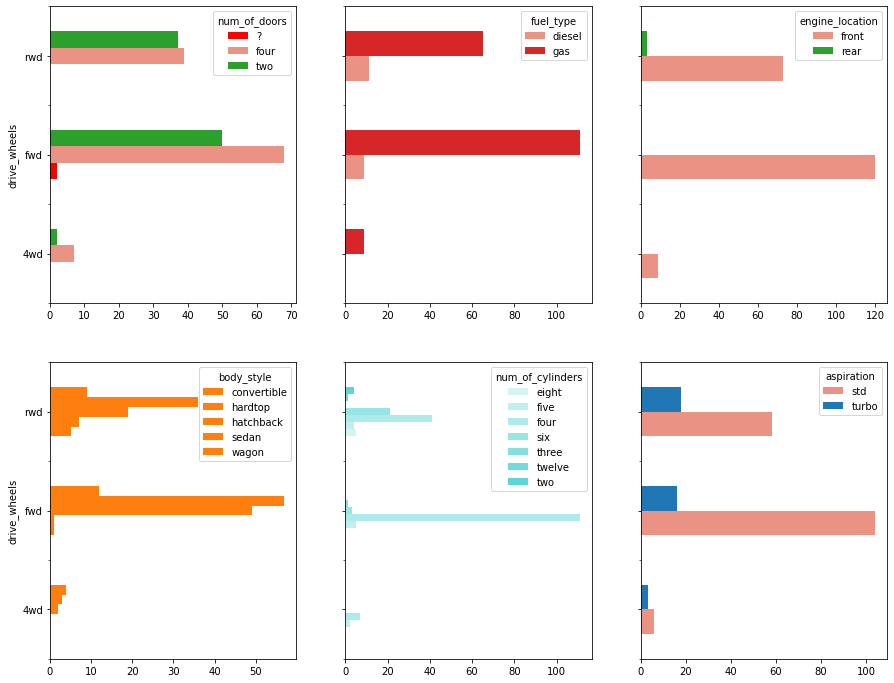

In [54]:
fig, ax = plt.subplots(2,3,figsize = (15,12),sharey='all')
drive_fuel = pd.crosstab(car_data['drive_wheels'],car_data['fuel_type'])
drive_doors = pd.crosstab(car_data['drive_wheels'],car_data['num_of_doors'])
p1 = drive_doors.plot(kind='barh',ax=ax[0,0],color=('red','#ea9284','tab:green'))
p2 = drive_fuel.plot(kind='barh',ax=ax[0,1],color=('#ea9284','tab:red'))
p3 = pd.crosstab(car_data['drive_wheels'],car_data['engine_location']).plot(kind='barh',ax=ax[0,2],color=('#ea9284','tab:green'))
p4 = pd.crosstab(car_data['drive_wheels'],car_data['body_style']).plot(kind='barh',ax=ax[1,0],color=('C1'))
p5 = pd.crosstab(car_data['drive_wheels'],car_data['num_of_cylinders']).plot(kind='barh',ax=ax[1,1],color=((.2,.8,.8,.2),(.2,.8,.8,.3),(.2,.8,.8,.4),(.2,.8,.8,.5),(.2,.8,.8,.6),(.2,.8,.8,.7),(.2,.8,.8,.8)))
p6 = pd.crosstab(car_data['drive_wheels'],car_data['aspiration']).plot(kind='barh',ax=ax[1,2],color=('#ea9284','tab:blue'))
plt.show()

In [19]:
import dtale
dtale.show(car_data)

<AxesSubplot:xlabel='highway_mpg', ylabel='Density'>

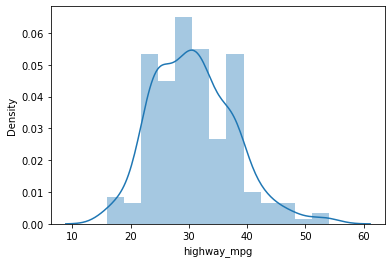

In [20]:
import seaborn as sns

sns.distplot(car_data['highway_mpg'])

## At first look, across the cars, the data looks almost normally distributed, with slight positive skew for highway mpg

<AxesSubplot:xlabel='city_mpg', ylabel='Density'>

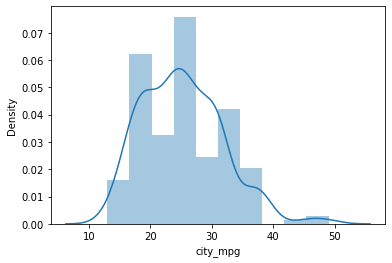

In [21]:
sns.distplot(car_data['city_mpg'])

## At first look, across the cars, the data looks almost normally distributed, with slight positive skew for city mpg

<AxesSubplot:>

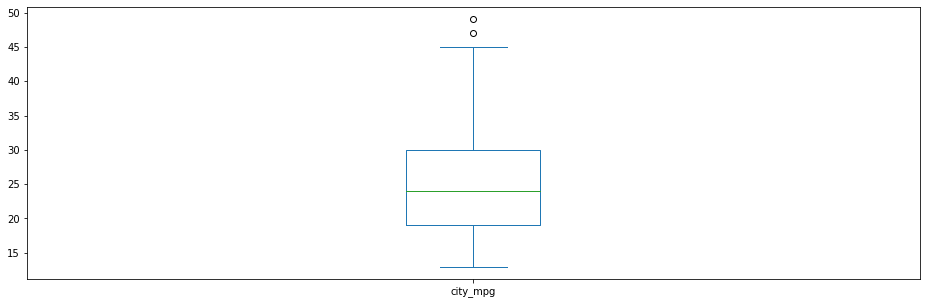

In [22]:
car_data['city_mpg'].plot.box(figsize=(16,5))

<AxesSubplot:>

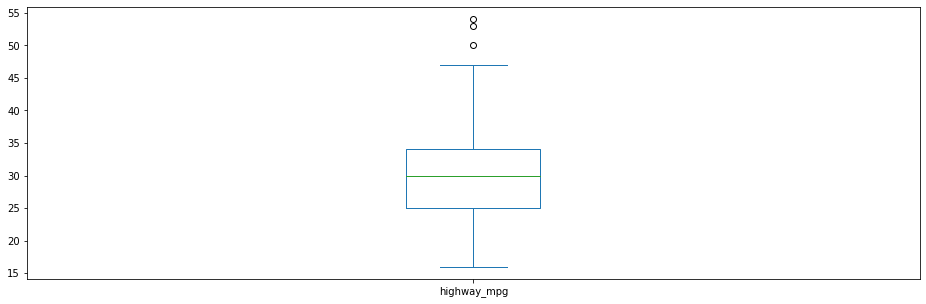

In [23]:
car_data['highway_mpg'].plot.box(figsize=(16,5))

<AxesSubplot:title={'center':'highway_mpg'}, xlabel='make'>

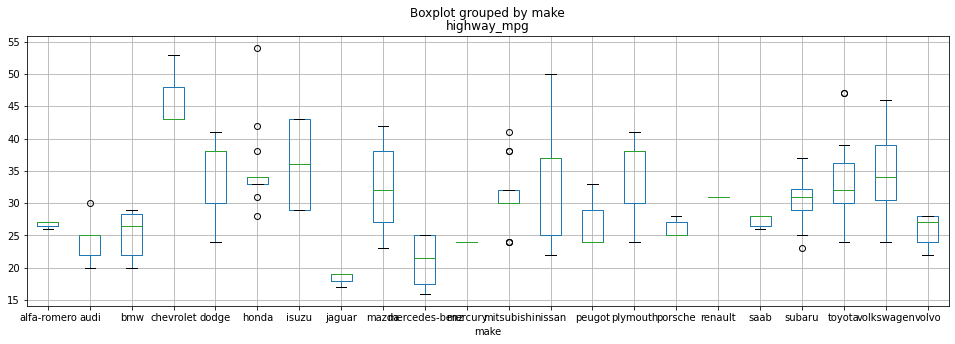

In [24]:
car_data.boxplot(column = 'highway_mpg', by = 'make',figsize=(16,5))

<AxesSubplot:title={'center':'city_mpg'}, xlabel='make'>

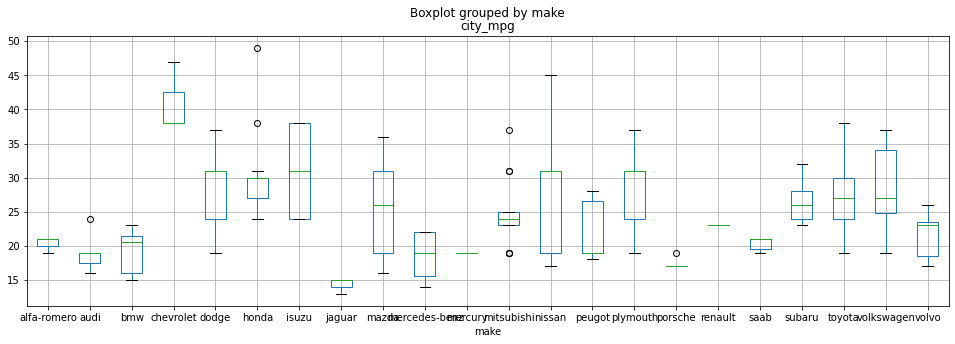

In [25]:
car_data.boxplot(column = 'city_mpg', by = 'make',figsize=(16,5))

# there is a considerable difference across makes when it comes to miles per gallon

### -> removing the grid to improve readability

<AxesSubplot:title={'center':'city_mpg'}, xlabel='make'>

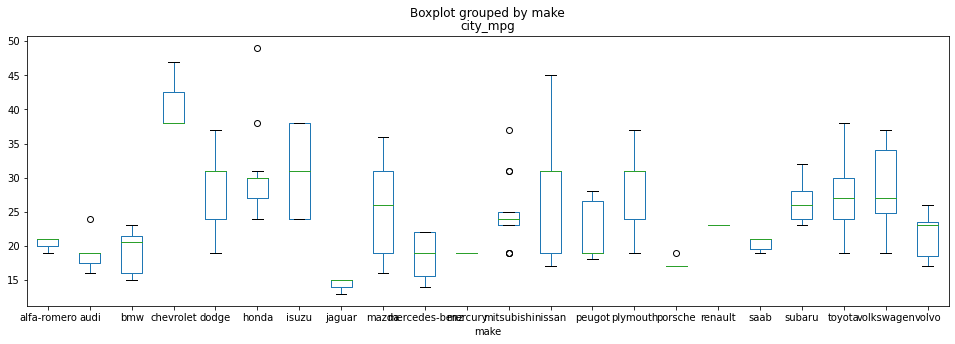

In [26]:
car_data.boxplot(column = 'city_mpg', by = 'make',figsize=(16,5),grid=False)

### -> making it horizontal to improve readability

<AxesSubplot:title={'center':'city_mpg'}, xlabel='make'>

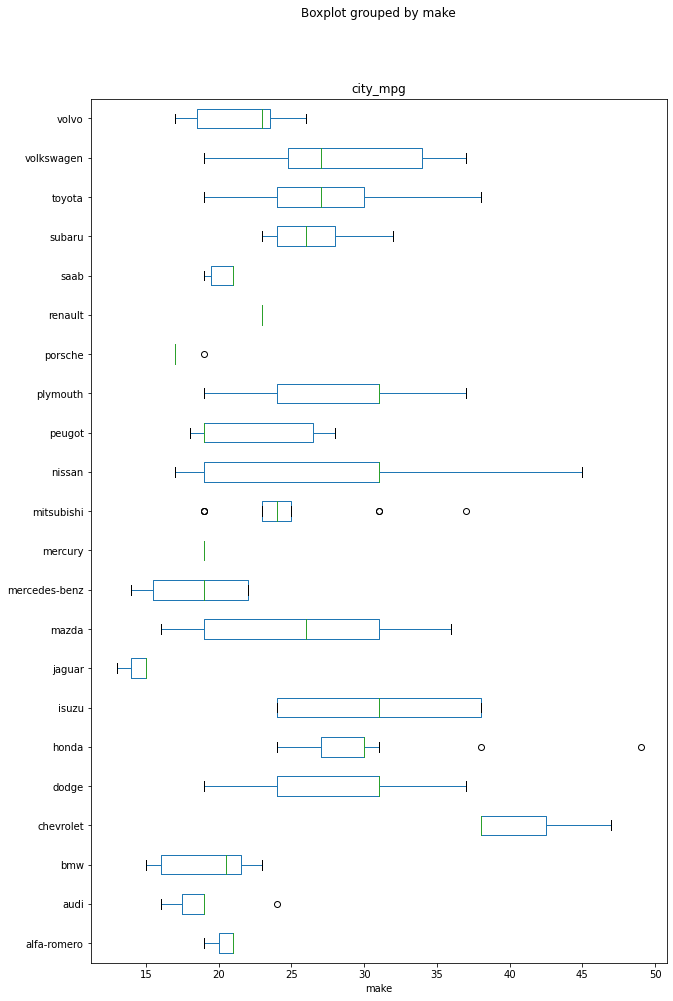

In [27]:
car_data.boxplot(column = 'city_mpg', by = 'make',figsize=(10,16),grid=False,vert=False)

<AxesSubplot:title={'center':'highway_mpg'}, xlabel='drive_wheels'>

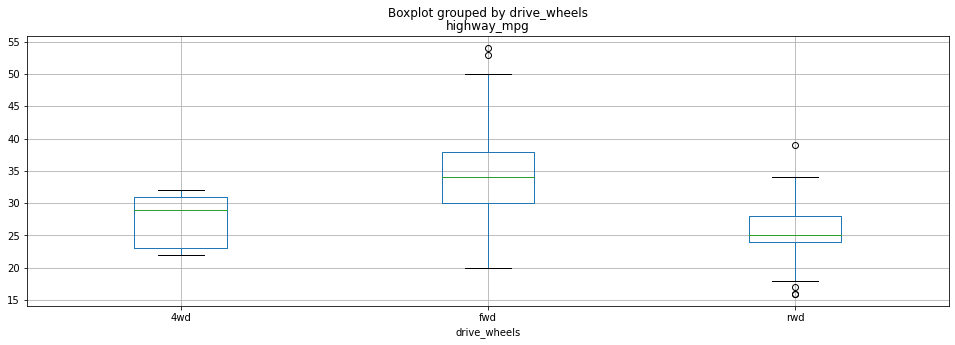

In [28]:
car_data.boxplot(column = 'highway_mpg', by = 'drive_wheels',figsize=(16,5))

<AxesSubplot:title={'center':'city_mpg'}, xlabel='drive_wheels'>

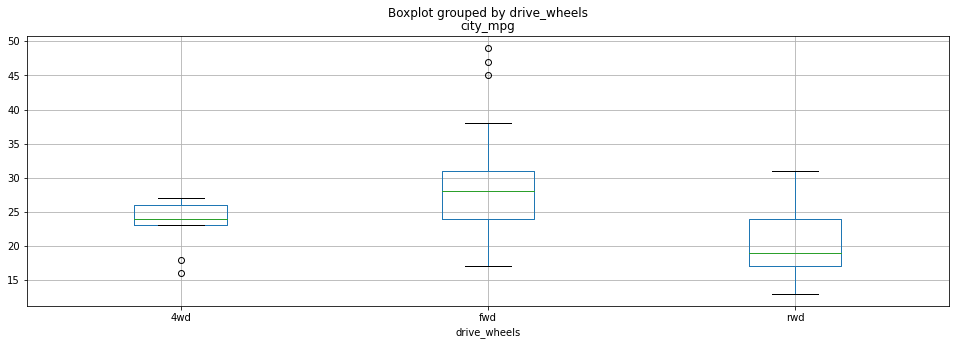

In [29]:
car_data.boxplot(column = 'city_mpg', by = 'drive_wheels',figsize=(16,5))

# Interpretation: Front Wheel Drive has higher % in overall data and one of the contributing factors for it might be the higher miles per gallon bith within city limits and on highways. It is more value for money

Let's do some cross tabulation now to see what type of cars are created with wheel drives

In [30]:
pd.crosstab(car_data.drive_wheels, car_data.body_style,margins=True,margins_name="total")

body_style,convertible,hardtop,hatchback,sedan,wagon,total
drive_wheels,,,,,,
4wd,0,0,2,3,4,9
fwd,1,1,49,57,12,120
rwd,5,7,19,36,9,76
total,6,8,70,96,25,205


Majortiy of the front wheel drive cars are deisgned as hatchback and sedan

In [31]:
pd.crosstab(car_data.drive_wheels, car_data.body_style,margins=True,margins_name="total",normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon,total
drive_wheels,,,,,,
4wd,0.000000,0.000000,0.009756,0.014634,0.019512,0.043902
fwd,0.004878,0.004878,0.239024,0.278049,0.058537,0.585366
rwd,0.024390,0.034146,0.092683,0.175610,0.043902,0.370732
total,0.029268,0.039024,0.341463,0.468293,0.121951,1.000000


In [32]:
# more than 50% of the cars are FWD with hatchback or sedan body style

In [33]:
pd.crosstab(car_data.drive_wheels, car_data.body_style,margins=True,margins_name="total",normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon,total
drive_wheels,,,,,,
4wd,0.000000,0.000,0.028571,0.03125,0.16,0.043902
fwd,0.166667,0.125,0.700000,0.59375,0.48,0.585366
rwd,0.833333,0.875,0.271429,0.37500,0.36,0.370732


In [34]:
# Of the hatchbacks, FWD represents 70% of the cars
# Of the sedans, FWD represents almost 60% of the cars

In [35]:
pd.crosstab(car_data.drive_wheels, car_data.body_style,margins=True,margins_name="total",normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
drive_wheels,,,,,
4wd,0.000000,0.000000,0.222222,0.333333,0.444444
fwd,0.008333,0.008333,0.408333,0.475000,0.100000
rwd,0.065789,0.092105,0.250000,0.473684,0.118421
total,0.029268,0.039024,0.341463,0.468293,0.121951


In [36]:
# Of the FWD cars, hatchback represents >40% of the cars
# Of the FWD cars, sedan represents >47% of the cars

In [37]:
pd.crosstab(car_data.drive_wheels, car_data.body_style, values=car_data.curb_weight, aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
drive_wheels,,,,,
4wd,NaN,NaN,2646.0,2573.0,2618.0
fwd,2254.0,2008.0,2182.0,2298.0,2464.0
rwd,2911.0,2925.0,2747.0,3108.0,3285.0


In [38]:
# Now, let's try grouping the data in crosstab

In [39]:
pd.crosstab(car_data.drive_wheels, [car_data.body_style,car_data.engine_location],margins=True)

body_style      convertible      hardtop      hatchback sedan wagon  All
engine_location       front rear   front rear     front front front     
drive_wheels                                                            
4wd                       0    0       0    0         2     3     4    9
fwd                       1    0       1    0        49    57    12  120
rwd                       4    1       5    2        19    36     9   76
All                       5    1       6    2        70    96    25  205

In [40]:
pd.crosstab(car_data.drive_wheels, [car_data.body_style,car_data.engine_location],margins=True, normalize=True)

body_style      convertible             hardtop           hatchback     sedan  \
engine_location       front      rear     front      rear     front     front   
drive_wheels                                                                    
4wd                0.000000  0.000000  0.000000  0.000000  0.009756  0.014634   
fwd                0.004878  0.000000  0.004878  0.000000  0.239024  0.278049   
rwd                0.019512  0.004878  0.024390  0.009756  0.092683  0.175610   
All                0.024390  0.004878  0.029268  0.009756  0.341463  0.468293   

body_style          wagon       All  
engine_location     front            
drive_wheels                         
4wd              0.019512  0.043902  
fwd              0.058537  0.585366  
rwd              0.043902  0.370732  
All              0.121951  1.000000

In [41]:
pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],margins=True)

engine_location       front                                      rear          \
body_style      convertible hardtop hatchback sedan wagon convertible hardtop   
drive_wheels                                                                    
4wd                       0       0         2     3     4           0       0   
fwd                       1       1        49    57    12           0       0   
rwd                       4       5        19    36     9           1       2   
All                       5       6        70    96    25           1       2   

engine_location  All  
body_style            
drive_wheels          
4wd                9  
fwd              120  
rwd               76  
All              205

In [42]:
pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],margins=True,normalize=True)

engine_location       front                                          \
body_style      convertible   hardtop hatchback     sedan     wagon   
drive_wheels                                                          
4wd                0.000000  0.000000  0.009756  0.014634  0.019512   
fwd                0.004878  0.004878  0.239024  0.278049  0.058537   
rwd                0.019512  0.024390  0.092683  0.175610  0.043902   
All                0.024390  0.029268  0.341463  0.468293  0.121951   

engine_location        rear                 All  
body_style      convertible   hardtop            
drive_wheels                                     
4wd                0.000000  0.000000  0.043902  
fwd                0.000000  0.000000  0.585366  
rwd                0.004878  0.009756  0.370732  
All                0.004878  0.009756  1.000000

In [43]:
pd.crosstab(car_data.drive_wheels,car_data.engine_location,margins=True)

engine_location,front,rear,All
drive_wheels,,,
4wd,9,0,9
fwd,120,0,120
rwd,73,3,76
All,202,3,205


In [44]:
pd.crosstab(car_data.drive_wheels,car_data.engine_location,margins=True,normalize=True)

engine_location,front,rear,All
drive_wheels,,,
4wd,0.043902,0.000000,0.043902
fwd,0.585366,0.000000,0.585366
rwd,0.356098,0.014634,0.370732
All,0.985366,0.014634,1.000000


### All FWD cars have engines only ont he front. Another point to note, Rear Wheel Drive cars, only 1.4% of them have enginer in the back

<AxesSubplot:xlabel='engine_location-body_style', ylabel='drive_wheels'>

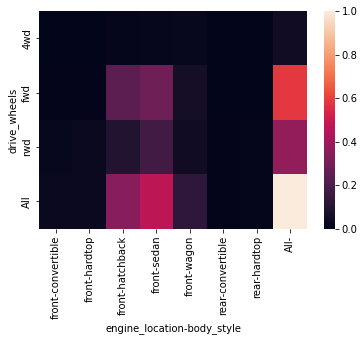

In [45]:
# Let's apply a heatmap to this crosstab based on count

sns.heatmap(pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],margins=True,normalize=True))

<AxesSubplot:xlabel='engine_location-body_style', ylabel='drive_wheels'>

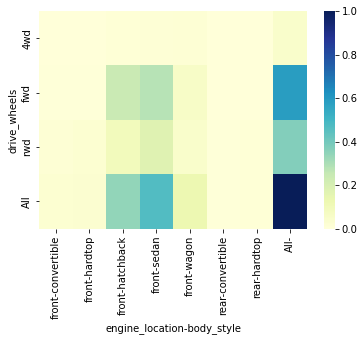

In [46]:
#This is too dark, let's try a different colormap.
sns.heatmap(pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],margins=True,normalize=True),cmap='YlGnBu')

<AxesSubplot:xlabel='engine_location-body_style', ylabel='drive_wheels'>

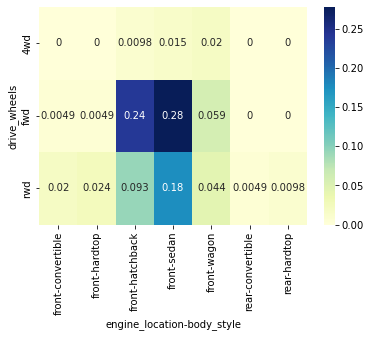

In [47]:
# remove "all / margins" and add annotation
sns.heatmap(pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],
                        normalize=True),cmap='YlGnBu',annot=True)

<AxesSubplot:xlabel='engine_location-body_style', ylabel='drive_wheels'>

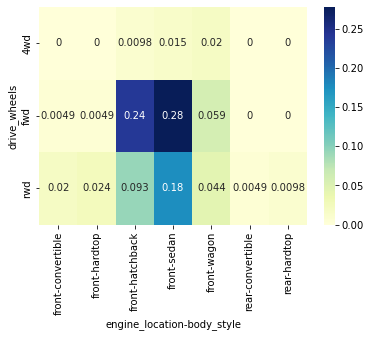

In [48]:
sns.heatmap(pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],
                        normalize=True),cmap='YlGnBu',annot=True)

<AxesSubplot:xlabel='engine_location-body_style', ylabel='drive_wheels'>

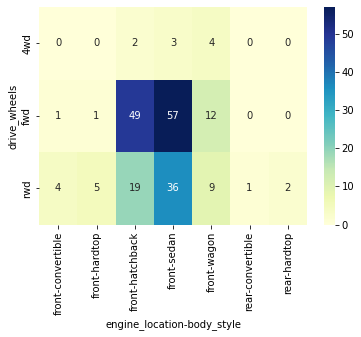

In [49]:
# doing the above graph / heatmap based on count instead of percentage
sns.heatmap(pd.crosstab(car_data.drive_wheels, [car_data.engine_location,car_data.body_style],
                        ),cmap='YlGnBu',annot=True)

In [50]:
# now let's look at the prices
pd.crosstab(car_data.drive_wheels, car_data.body_style, values=car_data.price, aggfunc='mean').round(0)

body_style
drive_wheels
4wd
fwd
rwd


In [51]:
#price is not working in this, because it is not treated as an integer in the dtype. We need to change it
pd.crosstab(car_data.drive_wheels, car_data.body_style, values=int(car_data.price), aggfunc='mean').round(0)

TypeError: cannot convert the series to <class 'int'>

In [ ]:
car_data1 = car_data[car_data.price !='?']

In [ ]:
car_data1['price'].describe()

In [ ]:
# now let's look at the prices
pd.crosstab(car_data1.drive_wheels, car_data1.body_style, values=car_data1.price, aggfunc='mean').round(0)

In [ ]:
# now let's look at the heatmap
sns.heatmap(pd.crosstab(car_data1.drive_wheels, car_data1.body_style, values=car_data1.price, aggfunc='mean').round(0),cmap='YlGnBu')

# Conclusion
## As you can see, FWD drives are generally cheaper than RWD.
## All in all, FWD gives better miles per gallon, and is cheaper on an average compared to both rwd and 4wd.
## It provides higher value for money
## if we were to consider the data set as a random sample and that it reflects the larger population's distribution
## then, the high value to cost of FWD cars justifies the higher presence in the market